<a href="https://colab.research.google.com/github/gskumlehn/autism-info-llm-comparison/blob/main/sentiment_analysis_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
!rm -r autism-info-llm-comparison/

In [195]:
!git clone https://github.com/gskumlehn/autism-info-llm-comparison.git

Cloning into 'autism-info-llm-comparison'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 150 (delta 25), reused 17 (delta 17), pack-reused 117 (from 1)
Receiving objects: 100% (150/150), 9.50 MiB | 24.43 MiB/s, done.
Resolving deltas: 100% (61/61), done.


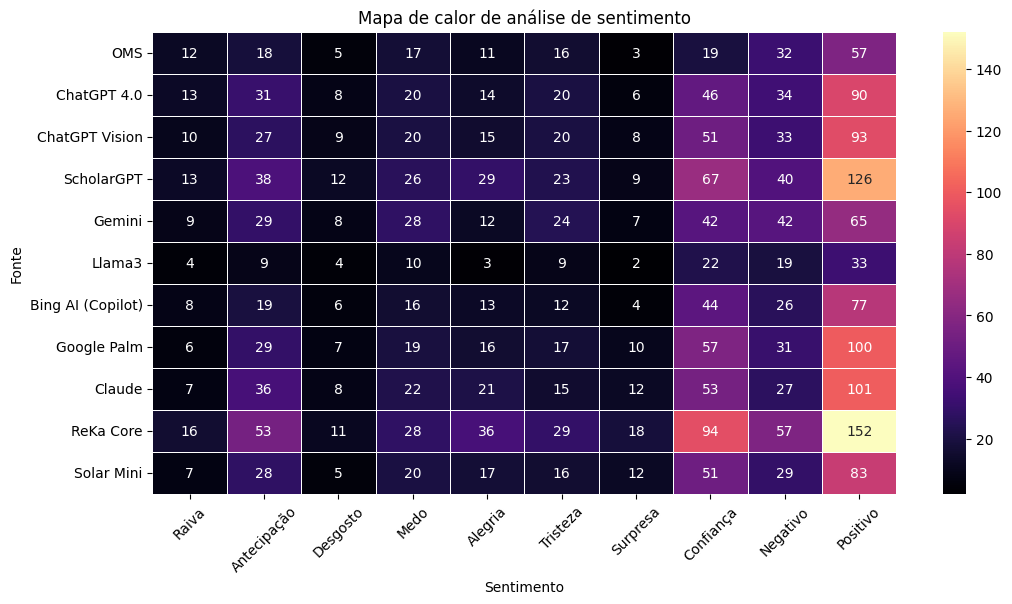

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_sentiments = pd.read_csv("autism-info-llm-comparison/sentiment_analysis_results.csv")
df_sentiments.set_index("Model", inplace=True)
cmap = sns.color_palette("magma", as_cmap=True)

plt.figure(figsize=(12, 6))
sns.heatmap(df_sentiments, cmap=cmap, annot=True, fmt="d", linewidths=0.5, cbar=True)
plt.title("Mapa de calor de análise de sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Fonte")
plt.xticks(rotation=45)
plt.show()

                   Positivo  Negativo
Model                                
OMS                      57        32
ChatGPT 4.0              90        34
ChatGPT Vision           93        33
ScholarGPT              126        40
Gemini                   65        42
Llama3                   33        19
Bing AI (Copilot)        77        26
Google Palm             100        31
Claude                  101        27
ReKa Core               152        57
Solar Mini               83        29
Média                    89        34


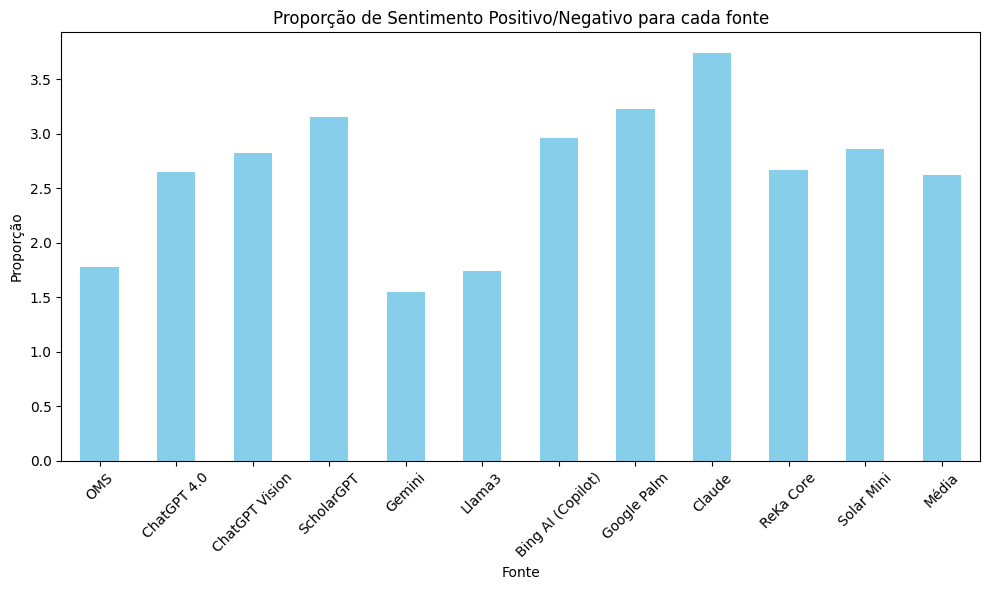

In [197]:
df_ratio = df_sentiments[["Positivo", "Negativo"]].copy()
df_ratio.loc['Média'] = df_ratio.mean().round().astype(int)

print(df_ratio)
df_ratio["positive_negative_ratio"] = df_ratio["Positivo"] / df_ratio["Negativo"]

plt.figure(figsize=(10, 6))
df_ratio["positive_negative_ratio"].plot(kind='bar', color='skyblue')
plt.title('Proporção de Sentimento Positivo/Negativo para cada fonte')
plt.xlabel('Fonte')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [198]:
df_word_count = pd.read_csv("autism-info-llm-comparison/word_count.csv")
df_sentiments = pd.read_csv("autism-info-llm-comparison/sentiment_analysis_results.csv")

In [199]:
df_sentiments.columns.tolist()[1:]

['Raiva',
 'Antecipação',
 'Desgosto',
 'Medo',
 'Alegria',
 'Tristeza',
 'Surpresa',
 'Confiança',
 'Negativo',
 'Positivo']

In [200]:
word_count_sum = df_word_count.tail(1).iloc[0].to_dict()

# Criar uma cópia do DataFrame de sentimentos para normalizar
df_sentiments = pd.read_csv("autism-info-llm-comparison/sentiment_analysis_results.csv")

# Normalizar colunas emocionais pelo total de palavras
sentiments = df_sentiments.columns.tolist()[1:]

for modelo in df_sentiments['Model']:
    if modelo in word_count_sum:
        divisor = word_count_sum[modelo]
        df_sentiments.loc[df_sentiments['Model'] == modelo, sentiments] = ((
            df_sentiments.loc[df_sentiments['Model'] == modelo, sentiments] / divisor
        ) * 10**3).round().astype(int)

# Calcular a média de cada coluna emocional (para todos os modelos)
sentiments_mean = df_sentiments[sentiments].mean()
df_sentiments.loc[11, 'Model'] = 'Média'
for sentiment in sentiments:
  df_sentiments.loc[11, sentiment] = sentiments_mean[sentiment].round().astype(int)


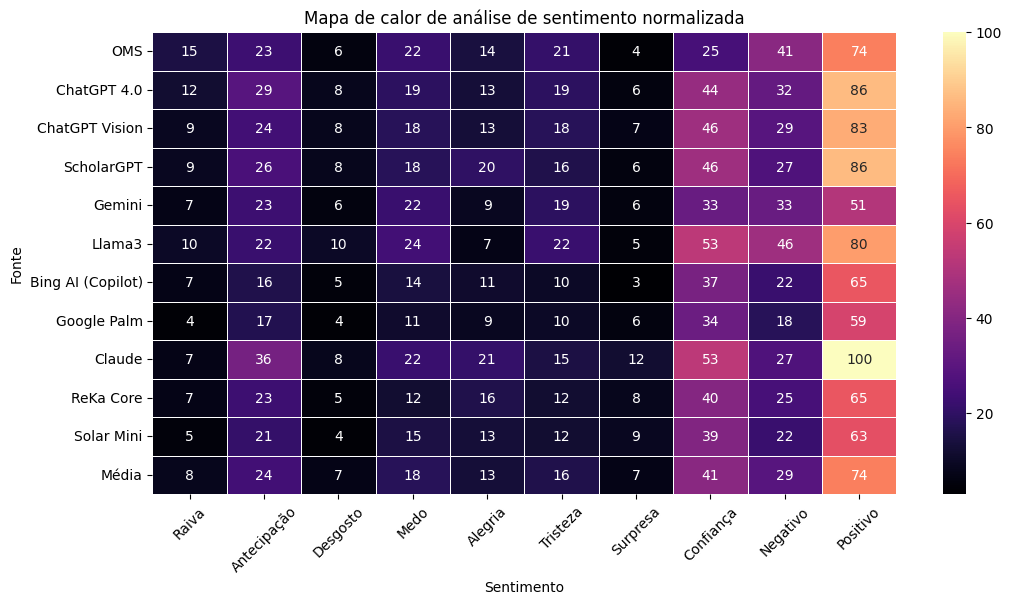

In [201]:
df_sentiments.set_index("Model", inplace=True)
cmap = sns.color_palette("magma", as_cmap=True)

plt.figure(figsize=(12, 6))
sns.heatmap(df_sentiments, cmap=cmap, annot=True, fmt=".0f", linewidths=0.5, cbar=True)
plt.title("Mapa de calor de análise de sentimento normalizada")
plt.xlabel("Sentimento")
plt.ylabel("Fonte")
plt.xticks(rotation=45)
plt.show()